In [68]:
import copy

import numpy as np
import matplotlib.pyplot as plt

In [69]:
x_mean = 3.3
sigma = 2.
x_upper = x_mean+sigma*2
x_vals = np.linspace(-15, 15, num=500)
gaussian_zero_mean = (1./(sigma*np.sqrt(2.*np.pi)))*np.e**(-x_vals**2/(2*sigma**2))
gaussian = (1./(sigma*np.sqrt(2.*np.pi)))*np.e**(-(x_vals-x_mean)**2/(2*sigma**2))
cut_gaussian = copy.copy(gaussian)
cut_gaussian[np.nonzero(x_vals<0)[0]]=0

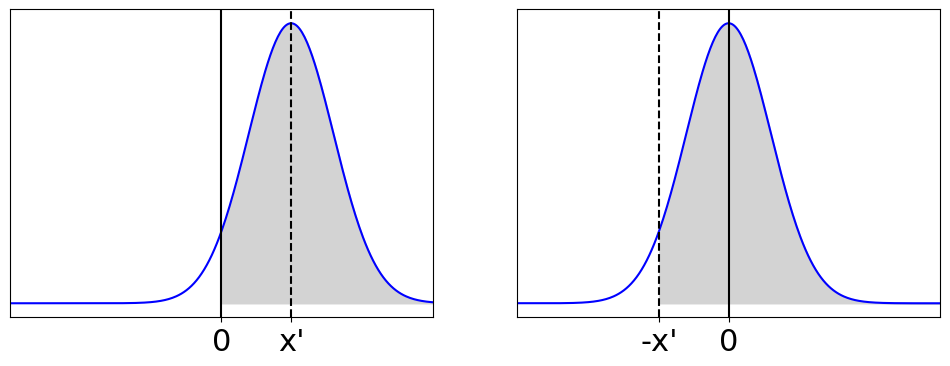

In [94]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 2)

fig.set_figwidth(12)
fig.set_figheight(4)
x_range = np.array([-1,1]) * 10

axs[0].plot(x_vals, gaussian, color="blue")
axs[0].axvline(x=0, color="black")
axs[0].axvline(x=x_mean, color="black", linestyle="--")
axs[0].fill_between(x=x_vals, y1=gaussian, where=x_vals>0, color="lightgrey")
axs[0].set_xlim(*x_range)
axs[0].get_yaxis().set_ticks([])
axs[0].get_xaxis().set_ticks([0, x_mean], labels=["0", "x'"])

axs[1].plot(x_vals, gaussian_zero_mean, color="blue")
axs[1].axvline(x=0, color="black")
axs[1].axvline(x=-1*x_mean, color="black", linestyle="--")
axs[1].fill_between(x=x_vals, y1=gaussian_zero_mean, where=x_vals>(-1*x_mean), color="lightgrey")
axs[1].set_xlim(*x_range)
axs[1].get_yaxis().set_ticks([])
axs[1].get_xaxis().set_ticks([-x_mean, 0], labels=["-x'", "0"])
fig.savefig("gaussian_integral_shift.pdf", dpi='figure')

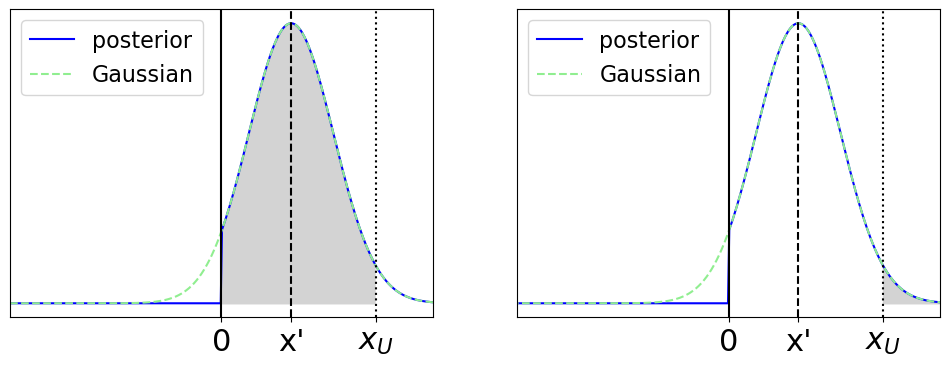

In [101]:
fig, axs = plt.subplots(1, 2)

fig.set_figwidth(12)
fig.set_figheight(4)
x_range = np.array([-1,1]) * 10

axs[0].plot(x_vals, cut_gaussian, color="blue", zorder=1, label="posterior")
axs[0].plot(x_vals, gaussian, color="lightgreen", linestyle="--", zorder=2, label="Gaussian")
axs[0].axvline(x=0, color="black")
axs[0].axvline(x=x_mean, color="black", linestyle="--")
axs[0].axvline(x=x_upper, color="black", linestyle=":")
axs[0].fill_between(x=x_vals, y1=cut_gaussian, where=(x_vals>0)&(x_vals<x_upper), color="lightgrey", zorder=0)
axs[0].set_xlim(*x_range)
axs[0].get_yaxis().set_ticks([])
axs[0].get_xaxis().set_ticks([0, x_mean, x_upper], labels=["0", "x'","$x_U$"])
axs[0].legend(prop={'size': 16})

axs[1].plot(x_vals, cut_gaussian, color="blue", zorder=1, label="posterior")
axs[1].plot(x_vals, gaussian, color="lightgreen", linestyle="--", zorder=2, label="Gaussian")
axs[1].axvline(x=0, color="black")
axs[1].axvline(x=x_mean, color="black", linestyle="--")
axs[1].axvline(x=x_upper, color="black", linestyle=":")
axs[1].fill_between(x=x_vals, y1=cut_gaussian, where=x_vals>x_upper, color="lightgrey", zorder=0)
axs[1].set_xlim(*x_range)
axs[1].get_yaxis().set_ticks([])
axs[1].get_xaxis().set_ticks([0, x_mean, x_upper], labels=["0", "x'","$x_U$"])
axs[1].legend(prop={'size': 16})
fig.savefig("posterior_integral_shift.pdf", dpi='figure')
